Il codice nella cella seguente **deve essere eseguito**, ma **non deve essere modificato**, perché essenziale per un'esecuzione senza errori del successivo codice del laboratorio. Dopo averlo eseguito, attendi che il pallino adiacente ad R in alto a destra diventi bianco o che scompaia il simbolo [*].

In [1]:
#Esegui ma non modificare. Attendi  che scompaia il simbolo [*] 
#o che il pallino adiacente ad R in alto a destra diventi bianco
#potrebbe essere necessario qualche minuto
source('lib/preamble.R')

# Analisi dei gruppi (clustering): Clustering gerarchico

A differenza del $K$-means, il clustering gerarchico 
* **non richiede** di stabilire a priori il numero $K$ di cluster, in cui suddividere le $n$ osservazioni
* **permette** una rappresentazione  grafica  ad albero rovesciato (come puoi vedere dalla figura) dei cluster ottenuti, chiamata **dendogramma**, in grado di visualizzare il legame gerarchico tra i cluster e supportare la scelta ottimale di $K$. 

![Esempio di dendogramma](lib/dendogramma.png)

Come per il $K$-means, c'è bisogno che tu scelga il tipo di distanza/dissimilarità tra osservazioni (per esempio la distanza euclidea) e di *linkage* tra cluster da adottare.

## Algoritmo gerarchico
L'algoritmo delineato di seguito ti permetterà di costruire un dendogramma mediante un approccio dal basso o **bottom-up**. Imparerai a leggere il dendogramma per visualizzare sia il grado di dissimilarità/distanza tra cluster (definito linkage) che la distanza tra le osservazioni. Una volta costruito il dendogramma, ti fornirò delle linee guida che ti permetteranno di scegliere (come fatto mediante il coefficiente di silhouette per il valore $K$ del $K$-means) dove tagliare il dendogramma e ottenere la soluzione (ottimale).

* Passo 1. Ad ogni osservazione assegna uno ed un solo cluster ($K=n$)
* Passo 2. Calcola il linkage tra tutte le $\binom{n}{2}=n(n-1)/2$ coppie di cluster.
* Passo 3. Per $K=n,n-1,\dots,2$,
    * (a) Identifica ed aggrega la **coppia** di cluster **meno dissimili** tra loro, aventi linkage più basso.
    * (b) Ricalcola  il linkage tra le coppie dei rimanenti $k-1$ cluster.

### Dendogramma   
Registrando tutti i valori di linkage ottenuti per ogni valore di $K$, l'algoritmo è in grado di disegnare con analogo approccio (bottom-up) il corrispondente dendogramma:

* Al Passo 1. gli $n$ cluster ottenuti sono rappresentati dalle *foglie* dell'albero rovesciato, visualizzate in basso.
* Man mano che ti sposti in verticale, dal basso verso l'alto, vedi alcune foglie unirsi, a coppie, in rami, che, a loro volta, si uniscono con una foglia o un altro ramo, fino a costruire l'albero rovesciato. 
* Nell'ultimo step ($K=2$), tutte le foglie sono state aggregate in rami e gli ultimi due rami sono aggregati un unico cluster (*radice*). 

Esplorando il dendogramma dal basso verso l'alto, le osservazioni/foglie con una distanza/dissimilarità minore, sono foglie, o fanno parte di rami, che si uniscono, per la prima volta, ad una altezza minore del dendogramma. Più due gruppi (dove per gruppo intendiamo, in generale, anche quello formato da una sola osservazione) sono **simili**, più in basso vengono agglomerati insieme per la prima volta.
Fai attenzione al fatto che è totalmente irrilevante quanto le osservazioni siano vicine lungo la **direzione orizzontale**!


### Scelta dell'altezza a cui tagliare il dendogramma

Una volta costruito il dendogramma, per ottenere  la soluzione (ottimale) finale è necessario stabilire dove applicare un *taglio* (orizzontale) al dendogramma.
I gruppi (distinti) che si leggono sul dendogramma a ridosso di tale taglio rappresentano la soluzione. 
L'altezza a cui avviene il taglio determina il numero $K$ di cluster della soluzione finale.

Tuttavia, il criterio di scelta dell'altezza a cui effettuare il taglio del dendograma non è univoco.
Un criterio ragionevole è quello di scegliere, a partire *dall'alto* (ossia tenendo più basso possibile il numero di cluster) di tagliare il dendogramma dove i rami sono più lunghi.
Nella pratica, tale punto viene spesso scelto ad occhio (un po' come avviene per la scelta del numero di componenti principali da trattenere nella PCA). 
Si potrebbe, come fatto per il $K$-means, ovviamente anche utilizzare il coefficiente di silhouette, ma andrebbe sprecato il vantaggio peculiare del clustering gerarchico, ossia la possibilità di visualizzare il dendogramma, che contiene, in un solo colpo d'occhio, molte più informazioni.



## Perché gerarchico?

I cluster ottenuti tagliando il dendogramma ad una certa altezza (che generano una soluzione con un numero di cluster pari a $K$) confluiscono nei cluster ottenuti tagliando ad un'altezza maggiore ($K$ minore). 

Chiaramente un raggruppamento di questo tipo **non è sempre realistico**.
Pensa ad un gruppo di persone, con donne e uomini in pari numero, provenienti da tre nazionalità diverse, sempre in numero bilanciato. 
Il miglior clustering con $K=2$ corrisponderebbe alla divisione in base al genere e il migliore con $K=3$ corrisponderebbe alla divisione in base alla nazionalità. In questo caso il clustering gerarchico non è d'aiuto, in quanto non è ragionevole immaginare che i gruppi ottenuti scegliendo $K=3$ debbano necessariamente confluire in quelli ottenuti scegliendo $K=2$.    
    
## Clustering gerarchico in R
L'implementazione del clustering gerarchico in R avviene attraverso la funzione `hclust()`, che restituisce un oggetto di classe `hclust`. 
Tuttavia a differenza di quanto accadeva per la funzione `kmeans()`, il primo argomento di `hclust()` non è il data set da analizzare ma l'argomento `d=` che deve contenere la matrice delle distanze tra le osservazioni (per esempio quella euclidea) generata, come già fatto nella lezione introduttiva, mediante il comando `dist`.
Il linkage predefinito della funzione `hclust()` è il completo, contenuto nell'argomento predefinito `method = "complete"`.
Con riferimento al data set simulato già utilizzato per il $K$-means, visualizziamo nuovamente i dati e coloriamo in base ai veri cluster di appartenenza,

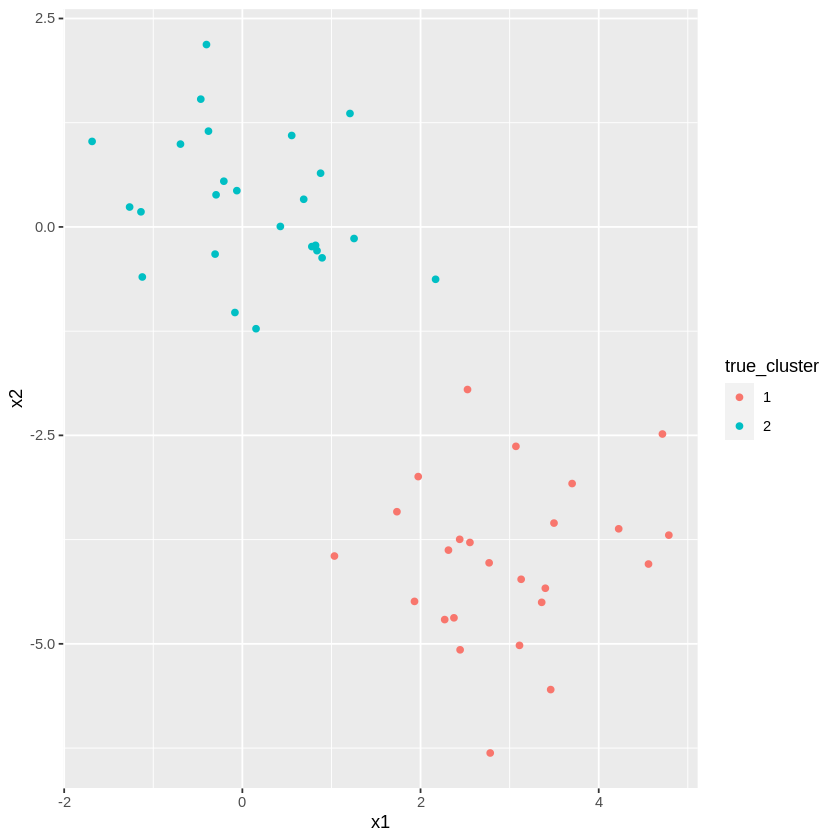

In [2]:
ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = true_cluster))

definisci una variabile "contenitore" dell'output di`hclust()`. Chiamala per esempio `hc_complete` 

In [3]:
euclid.d.matrix <- dist(df[,1:2]) #oppure 
#euclid.d.matrix <- dist(select(df, x1:x2))
hc_complete <- hclust(euclid.d.matrix)
class(hc_complete)

[1] "hclust"

Applicando la funzione `plot()` ad una variabile di classe `hclust`, puoi visualizzare il corrispondente dendogramma

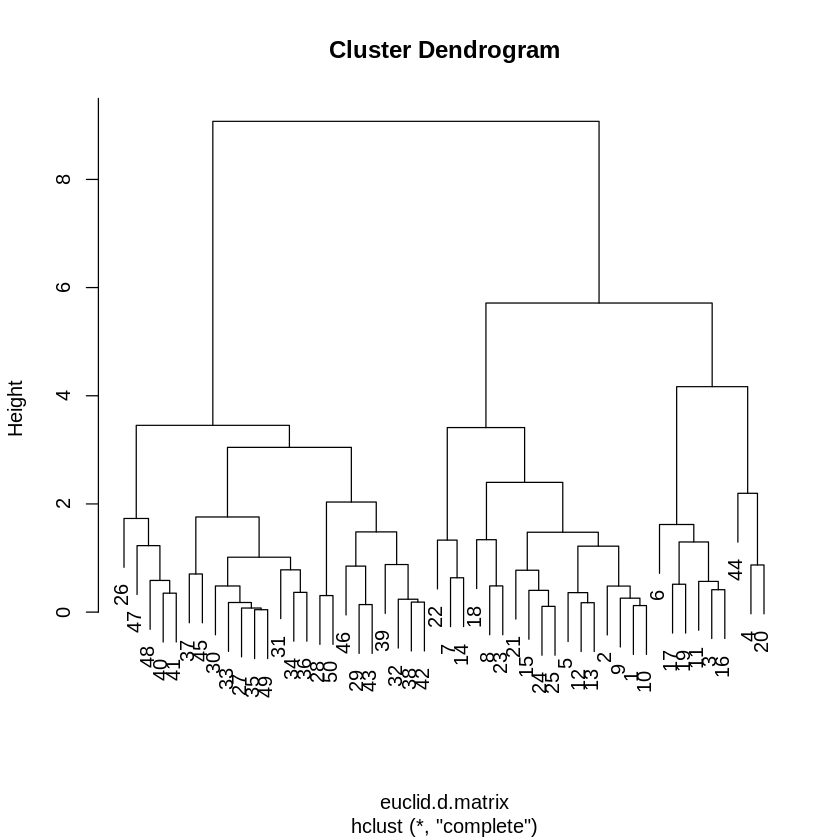

In [4]:
plot(hc_complete)

Ripeti l'analisi modificando il linkage

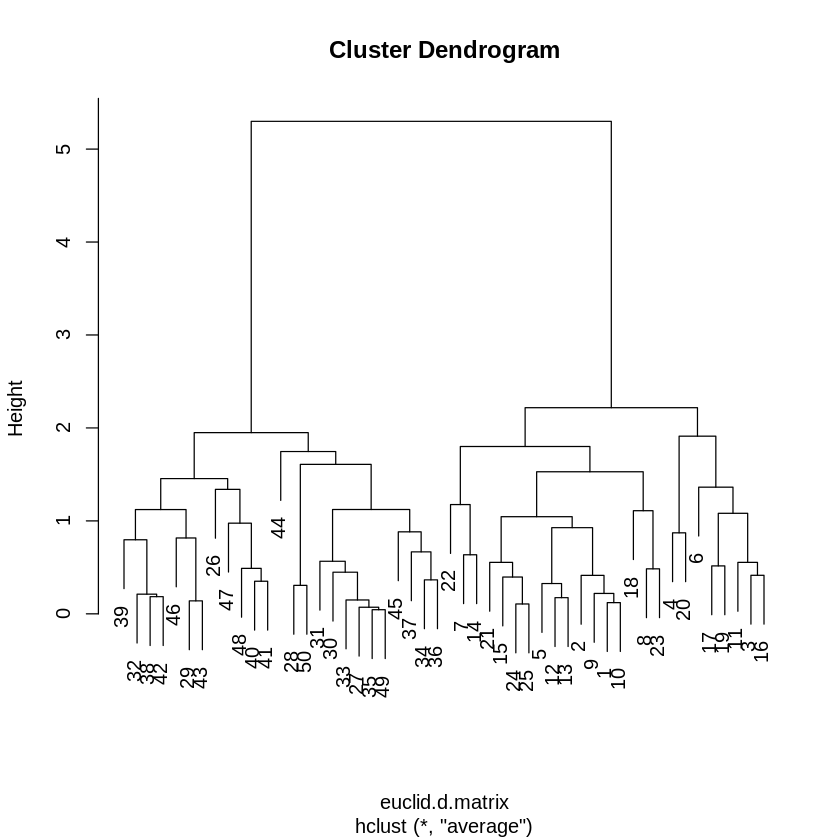

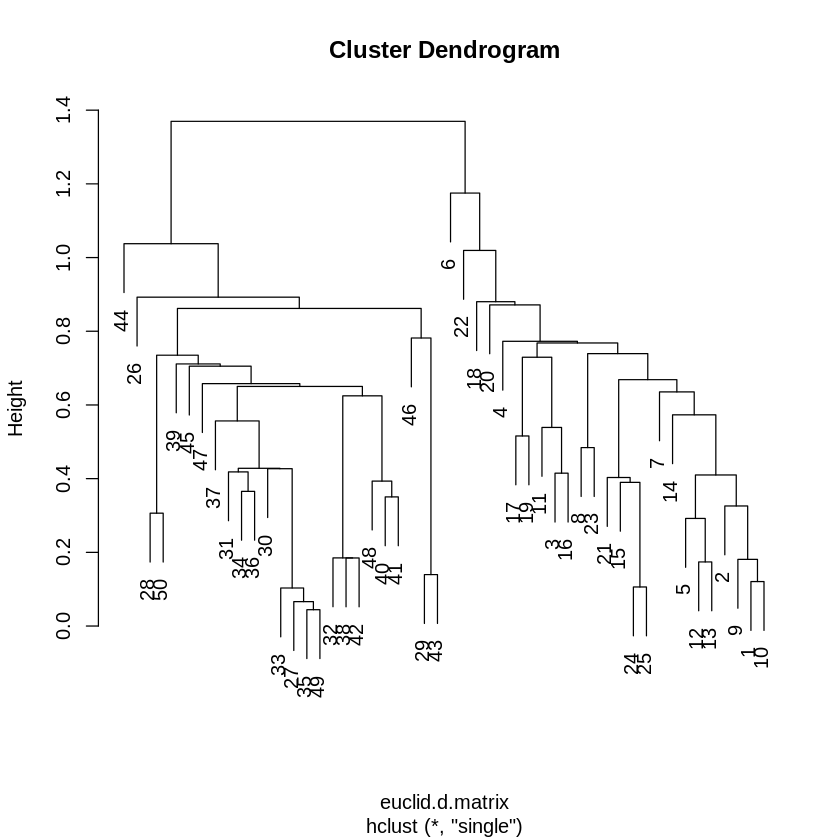

In [5]:
hc_average <- hclust(d = euclid.d.matrix, method = "average")
hc_single <- hclust(d = euclid.d.matrix, method = "single")

plot(hc_average)
plot(hc_single)

Puoi subito notare che per tutti e tre i tipi di linkage, i rami più lunghi, a partire *dall'alto* (ossia tenendo più basso possibile il numero di cluster) si ottengono sempre in corrispondenza di $K=2$.
Per ottenere la soluzione finale, puoi usare la funzione `cutree()` con argomenti 
* l'oggetto di classe `hclust` contenente il dendogramma da potare (cioè una variabile contentente l'output di `hclust()`) 
* il numero $K$ di cluster che vuoi ottenere nella soluzione finale.
Per esempio, imposta `k=2` e pota i dendogrammi contenuti in `hc_complete`,`hc_average` e `hc_single`.
Analogamente puoi impostare l'altezza `h=` del dendogramma a cui potare il dendogramma. 

In [6]:
cutree(hc_complete, k = 2) #è analoga a cutree(hc_complete, h = 6)
cutree(hc_average, k = 2)
cutree(hc_single, k = 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

Per visualizzare i differenti risultati, assegna i cluster ottenuti con i tre diversi linkage ad altrettante colonne del data set iniziale `df`

In [7]:
df <- df %>% 
  mutate(cluster_hc_complete_2 = factor(cutree(hc_complete, k = 2)),
         cluster_hc_average_2 = factor(cutree(hc_average, k = 2)),
         cluster_hc_single_2 = factor(cutree(hc_single, k = 2)))

e mappa le osservazioni (contenute nelle colonne `df$x1` e `df$x2`) con un diverso colore in base a tali colonne

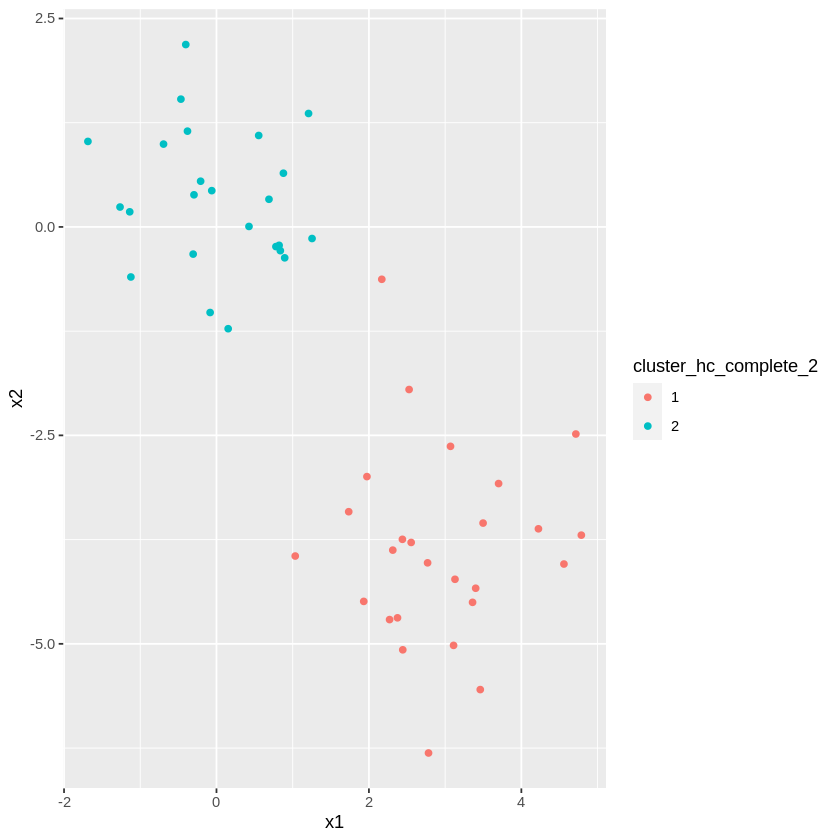

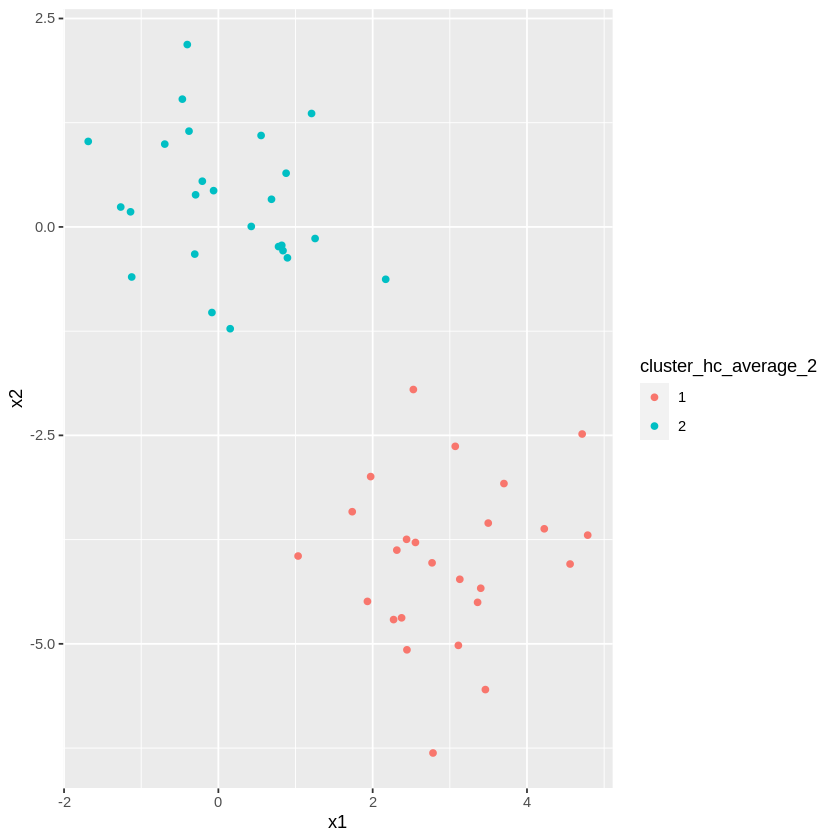

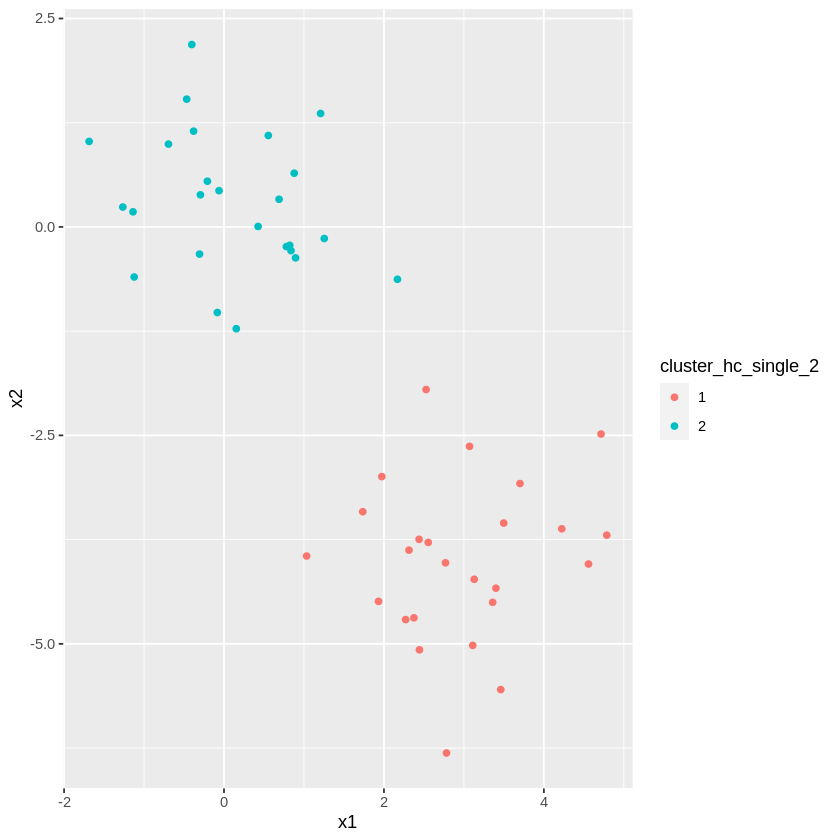

In [8]:
ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = cluster_hc_complete_2))

ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = cluster_hc_average_2))

ggplot(data = df) +
  geom_point(mapping = aes(x1, x2, colour = cluster_hc_single_2))

Ovviamente, sono sempre le osservazioni al margine tra i due cluster (in questo caso quelle centrali) a non essere sempre assegnate correttamente al cluster vero di appartenenza.
       
## Considerazioni finali

* Talvolta, gran parte delle osservazioni appartengono a pochi cluster, mentre un piccolo sottoinsieme di osservazioni sono molto diverse tra loro e dalle altre osservazioni, ma $K$-means e clustering gerarchico forzano tutte le osservazioni ad appartenere a un cluster, questo può creare problemi per la presenza di **outlier**.
* Gli algoritmi di clustering che ti ho illustrato sono generalmente poco *robusti* alle perturbazioni dei dati. Se applicassi, senza cambiare nulla, una stessa analisi ad un data set e ad un suo sottinsieme, i dati in comune potrebbero essere raggruppati in modo completamente diverso! 
Per questi motivi il clustering va considerata una tecnica di analisi *esplorativa* dei dati, ma non *conclusiva* di uno studio scientifico.

### Standardizzazione del data set
Come per la PCA, spesso è consigliabile standardizzare il data set in esame, se le variabili/colonne sono espresse in **diverse unità di misura** e non vogliamo che ciò incida nell'analisi. 
Chiaramente il **risultato** del clustering non è invariante ai cambiamenti di scala, come la PCA, e quindi  i risultati dell'analisi del data set standardizzato saranno, in generale, diversi.

### Ricapitolazione delle tipiche scelte da effettuare nel clustering

Possono avere un impatto importante sul clustering:

* **Scalare** o no le variabili?
* Per il **$K$-means clustering**:
    * *Quanti* cluster scegliere?
* Per il **clustering gerarchico**:
    * Quale misura di *dissimilarità*?
    * Che tipo di *linkage* utilizzare?
    * *Dove tagliare* il dendogramma (quanti cluster scegliere)?